In [0]:
!ls #comando ls
import pandas as pd
import numpy as np

instrumentos.csv  sample_data


Importamos los datos y vemos si se importó bien el archivo

In [0]:
datos=pd.read_csv('instrumentos.csv')
datos.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


Eliminamos las columnas que no brindan información relevante acerca de los productos

In [0]:
del datos['reviewerID']
del datos['asin']
del datos['reviewerName']
del datos['helpful']
del datos['unixReviewTime']
del datos['reviewTime']
datos.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.


Cambiamos los valores por 0 y 1, 0 si es de valor 5 y 1 para ver si es retroalimentación

In [0]:
def feedback(rating):
    if(int(rating) < 4):
        return 1
    else: 
        return 0
datos.overall = datos.overall.apply(feedback) 

In [0]:
datos[datos['overall'] == 0]

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",0,good
1,The product does exactly as it should and is q...,0,Jake
2,The primary job of this device is to block the...,0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,0,No more pops when I record my vocals.
...,...,...,...
10256,"Great, just as expected. Thank to all.",0,Five Stars
10257,I've been thinking about trying the Nanoweb st...,0,"Long life, and for some players, a good econom..."
10258,I have tried coated strings in the past ( incl...,0,Good for coated.
10259,"Well, MADE by Elixir and DEVELOPED with Taylor...",0,Taylor Made


Juntamos el texto del review con el de summary para tener solo una columna

In [0]:
datos['resume'] = datos['reviewText']+ '' + datos['summary']
del datos['reviewText']
del datos['summary']

In [0]:
datos.head()

,overall,resume
0,0,"Not much to write about here, but it does exac..."
1,0,The product does exactly as it should and is q...
2,0,The primary job of this device is to block the...
3,0,Nice windscreen protects my MXL mic and preven...
4,0,This pop filter is great. It looks and perform...


In [0]:
datos.overall.value_counts()

0    9022
1    1239
Name: overall, dtype: int64

Reviews con feedback

In [0]:
datos[datos.overall == 1].head(10)

,overall,resume
7,1,I now use this cable to run from the output of...
12,1,If you are not use to using a large sustaining...
15,1,I bought this to use with my keyboard. I wasn'...
50,1,I didn't expect this cable to be so thin. It's...
52,1,"It hums, crackles, and I think I'm having prob..."
59,1,Works for practice ... it's a guitar instrumen...
71,1,...unbalanced guitar cable is notoriously nois...
74,1,"It's a cable, no frills, tangles pretty easy a..."
76,1,"One end was loose, so I tightened it, it keeps..."
89,1,I'm a pro-cheapo and I hated this thing. They'...


Reviews sin feedback

In [0]:
datos[datos.overall == 0].head(10)

,overall,resume
0,0,"Not much to write about here, but it does exac..."
1,0,The product does exactly as it should and is q...
2,0,The primary job of this device is to block the...
3,0,Nice windscreen protects my MXL mic and preven...
4,0,This pop filter is great. It looks and perform...
5,0,So good that I bought another one. Love the h...
6,0,"I have used monster cables for years, and with..."
8,0,Perfect for my Epiphone Sheraton II. Monster ...
9,0,Monster makes the best cables and a lifetime w...
10,0,"Monster makes a wide array of cables, includin..."


In [0]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Limpiar el texto ayuda a reducir el ruido que se presenta en los comentarios.
Si se eliminan las **stop words** los reviews quedan sin palabras como **pero**, la cual es una palabra clave en la retroalimentación.

In [0]:
def clean_text(sentence):
    sentence = str(sentence).lower() 
    sentence = re.sub(r'\d+', '', sentence) #eliminamos números
    sentence = sentence.translate(str.maketrans('', '', string.punctuation)) #eliminamos signos de puntuación
    sentence = sentence.strip()
    """stop_words = set(stopwords.words('english')) 
    tokens = word_tokenize(sentence)
    result = [i for i in tokens if not i in stop_words] #eliminamos stopwords
    sentence = ' '.join(result)"""
    return sentence

Reviews sin ruido en ellas

In [0]:
datos["resume"] = datos["resume"].apply(clean_text)
datos.head(10)

,overall,resume
0,0,not much to write about here but it does exact...
1,0,the product does exactly as it should and is q...
2,0,the primary job of this device is to block the...
3,0,nice windscreen protects my mxl mic and preven...
4,0,this pop filter is great it looks and performs...
5,0,so good that i bought another one love the he...
6,0,i have used monster cables for years and with ...
7,1,i now use this cable to run from the output of...
8,0,perfect for my epiphone sheraton ii monster c...
9,0,monster makes the best cables and a lifetime w...


Separamos nuestros conjuntos de prueba y de entrenamiento

In [0]:
resume=datos['resume'].values
overall=datos['overall'].values

resume_train, resume_test = train_test_split(datos, test_size=None, random_state=None)

In [0]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

"""Función para mostrar una nube de palabras"""
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=300,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

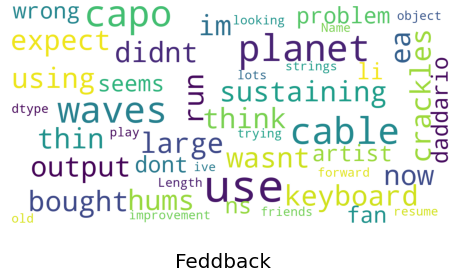

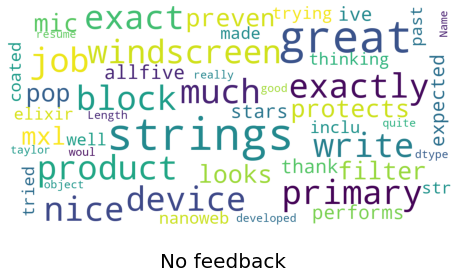

In [0]:
show_wordcloud(datos[datos.overall == 1]["resume"], title = "Feddback")
show_wordcloud(datos[datos.overall == 0]["resume"], title = "No feedback")

Los textos son una serie de palabras. Se necesita convertir los textos en vectores numéricos.
Se segmenta el texto en palabras y se cuenta el número de veces que se repite la palabra en el texto y al final se le asigna a acada palabra un id.

**TF-IDF:** Se puede reducir el peso de las palabras más comúnes como (the, is, an, etc.) que ocurren en todo el documento. **TF-IDF** significa Term Frecuency times Inverse Document Frecuency.

Hay varios algoritmos que pueden ser usados para la clasificació de textos.

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])
text_clf = text_clf.fit(resume_train["resume"], resume_train["overall"])

El desempeño del **Naive Bayes**

In [0]:
predicted_NB = text_clf.predict(resume_test["resume"])
np.mean(predicted_NB == resume_test["overall"])

0.8834762275915822

In [0]:
from sklearn.linear_model import LogisticRegression
text_clf_LR = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])
text_clf_LR = text_clf_LR.fit(resume_train["resume"], resume_train["overall"])

El desempeño con **Logistic Regression**

In [0]:
predicted_LR = text_clf_LR.predict(resume_test["resume"])
np.mean(predicted_LR == resume_test["overall"])

0.8885424785658612

In [0]:
from sklearn.linear_model import SGDClassifier
text_clf_SVM = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf-svm', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=42)),
])
text_clf_SVM = text_clf_SVM.fit(resume_train["resume"], resume_train["overall"])

El desempeño con **Support Vector Machines**

In [0]:
predicted_SVM = text_clf_SVM.predict(resume_test["resume"])
np.mean(predicted_SVM == resume_test["overall"])

0.8834762275915822

Los clasificadores tienen distintos parámetros los cuales pueden modificarse para obtener el desempeño óptimo

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1,1),(1,2),[1,3]],
              'tfidf__use_idf': (True,False),
              'clf__alpha':(1e-1,1e-5),}

In [0]:
gs_clf = GridSearchCV(text_clf, parameters, n_jobs=-1)
gs_clf = gs_clf.fit(resume_train["resume"], resume_train["overall"])

El mejor score y parámetros para **Naive Bayes**

In [0]:
print(gs_clf.best_score_)
print(gs_clf.best_params_)

0.8792722547108512
{'clf__alpha': 1e-05, 'tfidf__use_idf': False, 'vect__ngram_range': [1, 3]}


In [0]:
parameters_LR = {'vect__ngram_range': [(1,1),(1,2),[1,3]],
              'tfidf__use_idf': (True,False),
              'clf__C':(1e-1,1e-6),}

In [0]:
gs_clf_LR = GridSearchCV(text_clf_LR, parameters_LR, n_jobs=-1)
gs_clf_LR = gs_clf_LR.fit(resume_train["resume"], resume_train["overall"])

El mejor score y parámetros de **Logistic Regression**

In [0]:
print(gs_clf_LR.best_score_)
print(gs_clf_LR.best_params_)

0.8778427550357375
{'clf__C': 0.1, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 1)}


In [0]:
parameters_SVM = {'vect__ngram_range': [(1,1),(1,2),(1,3)],
              'tfidf__use_idf': (True,False),
              'clf-svm__alpha':(1e-2,1e-5),
              'clf-svm__epsilon':(1e-2,1e-6),}

In [0]:
gs_clf_SVM = GridSearchCV(text_clf_SVM, parameters_SVM, n_jobs=-1)
gs_clf_SVM = gs_clf_SVM.fit(resume_train["resume"], resume_train["overall"])

El mejor socre y parámetros para **Support Vector Machine**

In [0]:
print(gs_clf_SVM.best_score_)
print(gs_clf_SVM.best_params_)

0.8982456140350876
{'clf-svm__alpha': 1e-05, 'clf-svm__epsilon': 0.01, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


Con los parámetros indicados arriba, con la **SVM** se tiene el mejor resultado

In [0]:
text_clf_SVM = Pipeline([
    ('vect', CountVectorizer(ngram_range=(1,2))),
    ('tfidf', TfidfTransformer()),
    ('clf-svm', SGDClassifier(alpha=1e-05, epsilon=0.01)),
])
text_clf_SVM = text_clf_SVM.fit(resume_train["resume"], resume_train["overall"])

Con los nuevos parámetros, se alcanza un 90% de accuracy en el test

In [0]:
predicted_SVM = text_clf_SVM.predict(resume_test["resume"])
np.mean(predicted_SVM == resume_test["overall"])

0.9053000779423227

Se crea una función para clasificar reviews

In [0]:
def test_sentence(model,sentence):
    sentence = [sentence]
    result = model.predict(sentence)
    res = ['No Feedback','Feedback']
    print("El review es %s" % (res[int(result)]))

test_sentence(text_clf_SVM, "It’s a perfect starter pack. And the price is right.")
test_sentence(text_clf_SVM, "The trumpet is hard to blow and the keys stick")
test_sentence(text_clf_SVM, "This instrument has a good sound and is easy to play. It is good for beginners, especially at its price level.")
test_sentence(text_clf_SVM, "Not worth the money. It isn't the easiest to tune.")
test_sentence(text_clf_SVM, "Lovely recorder. Perfect for my 5 year old who is starting lessons.")
test_sentence(text_clf_SVM, "These instruments (the ones made in Italy, not China) have been great for my preschoolers. We originally bought a trumpet for my son, it held up to some very rough play, and my daughter loved his so much that we bought the multi-instrument set this past year. They make a rather pleasant sound as far as child instruments go (versus the recorderish squeal of many!). I also love how you really have to blow air while pushing the buttons to make a sound, introducing the children to real wood-wind instrument concepts.")
test_sentence(text_clf_SVM, "I wish I would not have bought this. This sound so horrible, and my kid keeps playing it. I guess you get what you pay for.")
test_sentence(text_clf_SVM, "The piano is very entertaining for kids. It has so many options to play like different instruments . It’s very good. In built music is nice for younger kids and also micro phone is working great.")
test_sentence(text_clf_SVM, "Piano stopped working even after replacing the batteries few times .The sound quality was ok. Ended up returning")

El review es No Feedback
El review es Feedback
El review es No Feedback
El review es Feedback
El review es No Feedback
El review es No Feedback
El review es Feedback
El review es No Feedback
El review es Feedback


Se casifican bastante bien los reviews que son buenos, pero se tiene dificultad al clasificar los que contienen feedback

In [0]:
test_sentence(text_clf_SVM, "The recorders arrived on time, but 9 out of 10 had torn/ripped cases. I was not pleased with this as I had bought them for my students, and I had to buy alternate cases in order to give them out to the kids.")
test_sentence(text_clf_SVM, "It's not in perfect tune, unfortunately. It works for kids, but not if you want to play for real.")
test_sentence(text_clf, "The guitar is much heavier than I thought, so the advantage it’s diminutive size grants for travel, is somewhat diminished by its surprising heft.")

El review es No Feedback
El review es No Feedback
El review es No Feedback
